# BDM550 - Final Project
## Part 02

- Name: Ran Arino
- Student ID: 153073200
- Email: rarino@myseneca.ca
- Course: Predictive Analytics
- Course ID: BDM550NAA.05359.2237
- Professor: Dr. Elnaz Delpisheh

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

from joblib import load
import time

In [2]:
# load data frame
df = pd.read_csv('df.csv')
df.head()

,title,date,content
0,House Republicans Fret About Winning Their Hea...,2016-12-31,washington — congression republican new fear c...
1,Rift Between Officers and Residents as Killing...,2017-06-19,bullet shell get count blood dri votiv candl b...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",2017-01-06,walt disney ’ “ bambi ” open 1942 critic prais...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",2017-04-10,death may great equal ’ necessarili evenhand f...
4,Kim Jong-un Says North Korea Is Preparing to T...,2017-01-02,seoul south korea — north korea ’ leader kim s...


In [3]:
# loading the models
lda_model = load('lda_model.joblib')
vectorizer = load('vectorizer.joblib')
vect_texts = vectorizer.transform(df['content'])

# get topic-word distribution
topic_word_dist = lda_model.components_
# get document-word distribution
doc_word_dist = lda_model.transform(vect_texts)

### Visualization

In [6]:
# the top 10 words for each topic
def top_words(lda_model, vectorizer, n_top_words):
    top_words_data = {}
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        col = f"t{topic_idx+1}"
        val = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]

        top_words_data.update({col: val})

    return pd.DataFrame(top_words_data)

n_top_words = 10
top_words_df = top_words(lda_model, vectorizer, n_top_words)
top_words_df

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20
0,health,american,north,trump,said,trump,said,court,like,game,said,compani,said,said,said,percent,trump,show,senat,trump
1,school,polit,said,clinton,drug,vote,twitter,law,say,team,attack,use,state,polic,mr,said,said,film,republican,immigr
2,peopl,trump,water,said,say,voter,presid,case,peopl,said,state,facebook,would,offic,new,year,clinton,one,hous,presid
3,would,peopl,korea,campaign,food,state,church,state,one,year,forc,appl,russia,told,compani,market,presid,year,said,countri
4,state,muslim,year,go,car,elect,post,said,think,play,islam,said,presid,report,million,billion,report,new,democrat,said
5,student,america,south,say,compani,republican,march,feder,go,one,militari,technolog,unit,peopl,money,rate,news,music,presid,refuge
6,tax,nation,state,presid,diseas,clinton,show,judg,get,player,kill,like,countri,one,citi,compani,investig,movi,would,border
7,care,right,china,republican,zika,poll,first,justic,time,time,isi,user,russian,kill,york,price,hous,like,bill,order
8,plan,one,climat,donald,use,percent,event,attorney,thing,first,group,new,govern,man,busi,report,email,time,vote,state
9,year,countri,say,peopl,health,mr,day,legal,want,season,peopl,googl,us,shoot,year,trade,campaign,play,court,unit


Text(0.5, 0, 'Topics')

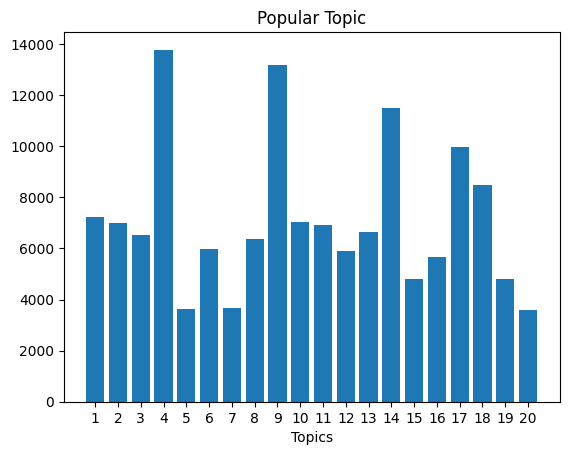

In [7]:
# Most popular topic based in distribution

# counting popular topic in each document
topic_counts = np.zeros(lda_model.n_components)
for dist in doc_word_dist:
    # get the position of the largest distribution
    max_topic_idx = np.argmax(dist)
    topic_counts[max_topic_idx] += 1

plt.bar(x=[str(i) for i in range(1, lda_model.n_components+1)],
        height=topic_counts)
plt.title("Popular Topic")
plt.xlabel('Topics')

In [45]:
# define funciton to handle two types of string date formats
def custom_date_parset(series):
    for form in ('%Y-%m-%d', '%Y/%m/%d'):
        try:
            return pd.to_datetime(series, format=form)
        
        except ValueError:
            continue

# create data for data frame
topic_timeline_data = {'Date': df['date'].apply(custom_date_parset)}
topic_timeline_data.update({
    f'Topic{i+1}': doc_word_dist[:, i] for i in range(lda_model.n_components)
})

# data frame of topic distributions with time series
topic_timeline_df = pd.DataFrame(topic_timeline_data)
topic_timeline_df.head()

,Date,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20
0,2016-12-31,0.315832,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.129387,0.000099,...,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.553101,0.000099
1,2017-06-19,0.043628,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.081896,0.072649,...,0.000019,0.000019,0.000019,0.656833,0.097615,0.031968,0.000019,0.000019,0.000019,0.000019
2,2017-01-06,0.059148,0.000037,0.092004,0.000037,0.000037,0.000037,0.000037,0.000037,0.068826,...,0.025168,0.000037,0.000037,0.000037,0.085670,0.000037,0.000037,0.616089,0.000037,0.052610
3,2017-04-10,0.000041,0.051315,0.000041,0.004178,0.000041,0.000041,0.041623,0.000041,0.077382,...,0.023856,0.000041,0.011547,0.028751,0.000041,0.008050,0.000041,0.570145,0.020247,0.000041
4,2017-01-02,0.000117,0.017574,0.588651,0.000117,0.000117,0.000117,0.015627,0.000117,0.000117,...,0.000117,0.000117,0.376274,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117


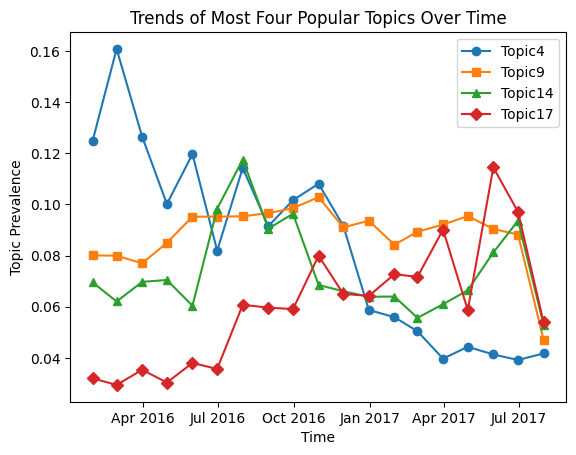

In [73]:
# grouped by monthly and get the mean of topic distribution
g_df = topic_timeline_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

# change the date ranges to 2016-2017
g_df_16_17 = g_df.loc['2016-01-01':'2017-12-31']

# select topics (most popular one) based on the bar plot
selected_topics = [f"Topic{t}" for t in [4, 9, 14, 17]]

# plotting line graphs
markers = ['o', 's', '^', 'D']
for i in range(len(selected_topics)):
    plt.plot(g_df_16_17.index, g_df_16_17[selected_topics[i]], 
             label=selected_topics[i], marker=markers[i])

# adjust x-axis tick labels
months = mdates.MonthLocator(bymonth=[1, 4, 7, 10])
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.ylabel('Topic Prevalence')
plt.title('Trends of Most Four Popular Topics Over Time')
plt.legend()
plt.show()

In [78]:
# get the silhouette score
silhouette_20 = silhouette_score(vect_texts, np.argmax(doc_word_dist, axis=1))
silhouette_20

-0.09165419438625358

In [93]:
# motoring time
def show_time(total_seconds):
    h, remainder = divmod(total_seconds, 3600)
    m, s = divmod(remainder, 60)

    return f"{int(h):02d}:{int(m):02d}:{int(s):02d}"

# define scores on each defined number of topics
scores = {num: 0.0 for num in [5, 8, 11, 14, 17, 23, 26, 29, 32]}

start = time.time()
for num_topic in scores.keys():
    print(f"Start '{num_topic}' topic; {show_time(time.time()-start)}")
    # recreate model
    ldas = LatentDirichletAllocation(n_components=num_topic)
    # document-word distributions
    doc_word_dists = ldas.fit_transform(vect_texts)
    # each score
    scores[num_topic] = silhouette_score(vect_texts, np.argmax(doc_word_dists, axis=1))

# add scores when 20 topics (initial model)
scores.update({20: silhouette_20})

end = time.time()
print(f"Ended all processes; {show_time(end-start)}")

Start '5' topic; 00:00:00
Start '8' topic; 01:55:26
Start '11' topic; 03:33:21
Start '14' topic; 05:34:31
Start '17' topic; 06:42:29
Start '23' topic; 08:00:47
Start '26' topic; 09:48:43
Start '29' topic; 11:55:59
Start '32' topic; 15:01:05
Ended all processes; 18:19:09


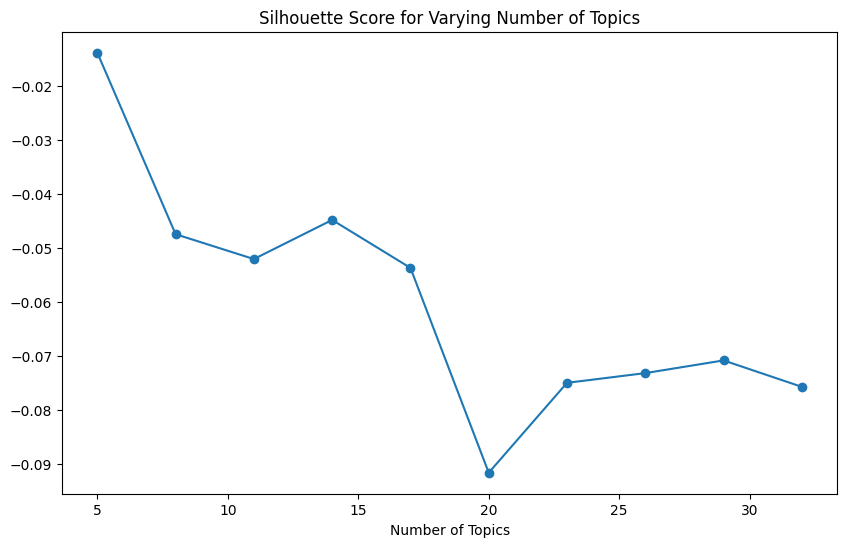

In [101]:
# sort scores
scores =dict(sorted(scores.items()))
plt.figure(figsize=(10, 6))
plt.plot(scores.keys(), scores.values(), marker='o')
plt.xlabel('Number of Topics')
plt.title('Silhouette Score for Varying Number of Topics')
plt.show()

In [102]:
# extra learning (number of topics are from 2 to 4)
#  because all selected number of topics showed worse scores.
start = time.time()
extra_topis = [2,3,4]
for num_topic in extra_topis:
    print(f"Start '{num_topic}' topic; {show_time(time.time()-start)}")
    # recreate model
    ldas = LatentDirichletAllocation(n_components=num_topic)
    # document-word distributions
    doc_word_dists = ldas.fit_transform(vect_texts)
    # each score
    scores[num_topic] = silhouette_score(vect_texts, np.argmax(doc_word_dists, axis=1))

end = time.time()
print(f"Ended all processes; {show_time(end-start)}")

Start '2' topic; 00:00:00
Start '3' topic; 01:04:32
Start '4' topic; 02:12:37
Ended all processes; 03:27:14


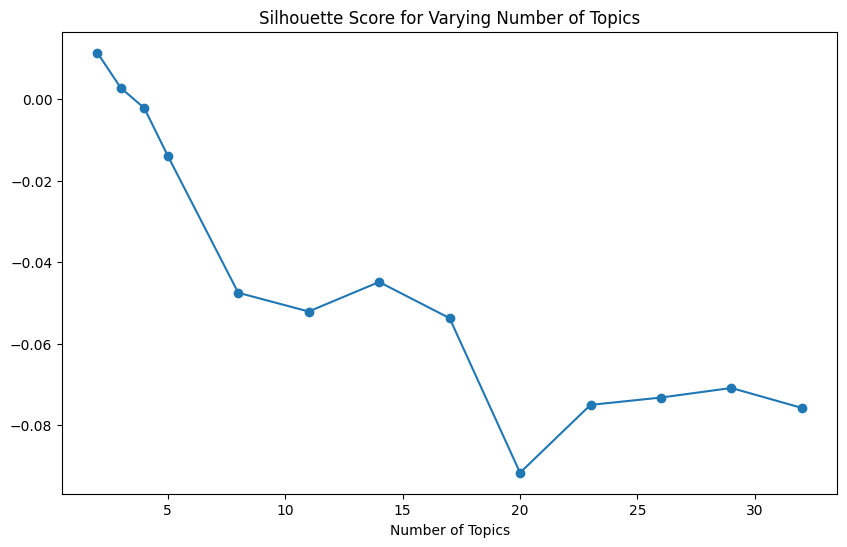

In [104]:
# sort scores
scores =dict(sorted(scores.items()))
plt.figure(figsize=(10, 6))
plt.plot(scores.keys(), scores.values(), marker='o')
plt.xlabel('Number of Topics')
plt.title('Silhouette Score for Varying Number of Topics')
plt.show()